In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the Boston Housing dataset
turbine_data_path = 'normalized_A1_turbine.csv'
turbine_data = pd.read_csv(turbine_data_path)

In [3]:
turbine_data

,Height over Sea Level,Fall 1,Fall 2,Fall 3,Flow
0,1.458733,1.494763,1.565871,-1.363870,-0.920759
1,-0.889207,-0.864935,-0.908663,0.322233,-0.087759
2,-1.160123,-1.144520,-1.180093,0.322233,-0.250873
3,1.639344,1.637351,1.545514,1.165284,2.003763
4,0.736290,0.724040,0.742534,0.041216,0.473213
...,...,...,...,...,...
445,-0.618291,-0.561119,-0.534543,-1.082853,-1.096736
446,0.826595,0.789277,0.667891,1.727319,1.844597
447,-0.437680,-0.506134,-0.535447,1.165284,0.668789
448,0.013847,-0.026180,-0.003898,0.322233,0.414058


In [4]:
# Normalize the data using Min-Max scaling
min_max_scaler = MinMaxScaler()
turbine_data_normalized = pd.DataFrame(min_max_scaler.fit_transform(turbine_data), columns=turbine_data.columns)


In [5]:
# Extract features (X) and target variable (y)
X = turbine_data_normalized.drop('Flow', axis=1).values
y = turbine_data_normalized['Flow'].values


   Variables:
        L: Number of layers is represented by self.L.
        n: The array with the number of units in each layer is represented by self.n.
        xi: The array of arrays for activations is represented by self.xi.
        w: The array of matrices for weights is represented by self.w.
        theta: The array of arrays for thresholds is represented by self.theta.
        delta: The array of arrays for the propagation of errors is represented by self.delta.
        d_w: The array of matrices for the changes of weights is represented by self.d_w.
        d_theta: The array of arrays for the changes of thresholds is represented by self.d_theta.
        d_w_prev: The array of matrices for the previous changes of weights is represented by self.d_w_prev.
        d_theta_prev: The array of arrays for the previous changes of thresholds is represented by self.d_theta_prev.
        fact: The activation function name is stored in self.activation.

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Load the Boston Housing dataset
turbine_data_path = 'normalized_A1_turbine.csv'
turbine_data = pd.read_csv(turbine_data_path)

In [8]:
turbine_data

,Height over Sea Level,Fall 1,Fall 2,Fall 3,Flow
0,1.458733,1.494763,1.565871,-1.363870,-0.920759
1,-0.889207,-0.864935,-0.908663,0.322233,-0.087759
2,-1.160123,-1.144520,-1.180093,0.322233,-0.250873
3,1.639344,1.637351,1.545514,1.165284,2.003763
4,0.736290,0.724040,0.742534,0.041216,0.473213
...,...,...,...,...,...
445,-0.618291,-0.561119,-0.534543,-1.082853,-1.096736
446,0.826595,0.789277,0.667891,1.727319,1.844597
447,-0.437680,-0.506134,-0.535447,1.165284,0.668789
448,0.013847,-0.026180,-0.003898,0.322233,0.414058


In [9]:
# Normalize the data using Min-Max scaling
min_max_scaler = MinMaxScaler()
turbine_data_normalized = pd.DataFrame(min_max_scaler.fit_transform(turbine_data), columns=turbine_data.columns)


In [10]:
# Extract features (X) and target variable (y)
X = turbine_data_normalized.drop('Flow', axis=1).values
y = turbine_data_normalized['Flow'].values


   Variables:
        L: Number of layers is represented by self.L.
        n: The array with the number of units in each layer is represented by self.n.
        xi: The array of arrays for activations is represented by self.xi.
        w: The array of matrices for weights is represented by self.w.
        theta: The array of arrays for thresholds is represented by self.theta.
        delta: The array of arrays for the propagation of errors is represented by self.delta.
        d_w: The array of matrices for the changes of weights is represented by self.d_w.
        d_theta: The array of arrays for the changes of thresholds is represented by self.d_theta.
        d_w_prev: The array of matrices for the previous changes of weights is represented by self.d_w_prev.
        d_theta_prev: The array of arrays for the previous changes of thresholds is represented by self.d_theta_prev.
        fact: The activation function name is stored in self.activation.

In [11]:
class MyNeuralNetwork:            
    def __init__(self, layers, learning_rate, momentum, activation, validation_percentage=0):
        self.L = len(layers)
        self.n = layers.copy()
        self.xi = [np.zeros(l) for l in layers]
        self.w = [np.random.randn(layers[i], layers[i-1]) for i in range(1, self.L)]
        self.theta = [np.zeros(l) for l in layers]
        self.delta = [np.zeros(l) for l in layers]
        self.d_w = [np.zeros_like(w) for w in self.w]
        self.d_theta = [np.zeros_like(t) for t in self.theta]
        self.d_w_prev = [np.zeros_like(w) for w in self.w]
        self.d_theta_prev = [np.zeros_like(t) for t in self.theta]
        self.learning_rate = learning_rate 
        self.momentum = momentum 
        self.activation = activation
        self.validation_percentage = validation_percentage
        self.loss_epochs = []

    def activation_function(self, x):
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'relu':
            return np.maximum(0, x)
        elif self.activation == 'linear':
            return x
        elif self.activation == 'tanh':
            return np.tanh(x)
        else:
            raise ValueError("Invalid activation function")

    def activation_derivative(self, x):
        if self.activation == 'sigmoid':
            return x * (1 - x)
        elif self.activation == 'relu':
            return np.where(x > 0, 1, 0)
        elif self.activation == 'linear':
            return 1
        elif self.activation == 'tanh':
            return 1 - x**2
        else:
            raise ValueError("Invalid activation function")

    def forward_pass(self, x):
        self.xi[0] = x
        for i in range(1, self.L):
            self.xi[i] = self.activation_function(np.dot(self.w[i-1], self.xi[i-1]) - self.theta[i])

    def backward_pass(self, y):
        self.delta[-1] = (self.xi[-1] - y) * self.activation_derivative(self.xi[-1])
        for i in range(self.L - 2, 0, -1):
            self.delta[i] = np.dot(self.w[i].T, self.delta[i+1]) * self.activation_derivative(self.xi[i])

    def update_weights(self):
        for i in range(1, self.L):
            self.d_w[i-1] = self.learning_rate * np.outer(self.delta[i], self.xi[i-1]) + self.momentum * self.d_w_prev[i-1]
            self.d_theta[i] = self.learning_rate * self.delta[i] + self.momentum * self.d_theta_prev[i]
            self.w[i-1] -= self.d_w[i-1]
            self.theta[i] -= self.d_theta[i]
            self.d_w_prev[i-1] = self.d_w[i-1]
            self.d_theta_prev[i] = self.d_theta[i]
            
    def mape(self, y_true, y_pred):
        mask = y_true != 0
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

    def fit(self, X, y, epochs, batch_size=32, learning_rate_decay=0.1):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.validation_percentage, random_state=42)

        loss_epochs = []

        for epoch in range(epochs):
            for _ in range(0, len(X_train), batch_size):
                batch_indices = np.random.choice(len(X_train), batch_size, replace=False)
                X_batch, y_batch = X_train[batch_indices], y_train[batch_indices]

                for i in range(len(X_batch)):
                    x_sample, y_sample = X_batch[i], y_batch[i]
                    self.forward_pass(x_sample)
                    self.backward_pass(y_sample)
                    self.update_weights()
               # Calculate training error (MSE) and MAPE
                train_predictions = self.predict(X_train)
                training_error = mean_squared_error(y_train, train_predictions)
                training_mape = self.mape(y_train, train_predictions)
                training_r2 = r2_score(y_train, train_predictions)

                # Calculate validation error (MSE) and MAPE
                val_predictions = self.predict(X_val)
                validation_error = mean_squared_error(y_val, val_predictions)
                validation_mape = self.mape(y_val, val_predictions)
                validation_r2 = r2_score(y_val, val_predictions)

                self.loss_epochs.append([training_error, validation_error, training_mape, validation_mape])

                # Print values during training
                if epoch % 10 == 0:
                    print(f"Epoch {epoch}/{epochs} - Training Error: {training_error}, Validation Error: {validation_error}, Training MAPE: {training_mape}, Validation MAPE: {validation_mape}, Training R2: {training_r2}, Validation R2: {validation_r2}")

            # Learning rate decay
            self.learning_rate *= (1.0 / (1.0 + learning_rate_decay * epoch))

        final_train_mape = self.mape(y_train, self.predict(X_train))
        final_val_mape = self.mape(y_val, self.predict(X_val))
        final_train_r2 = r2_score(y_train, self.predict(X_train))
        final_val_r2 = r2_score(y_val, self.predict(X_val))
        print(f"Final Training MAPE: {final_train_mape}, Final Validation MAPE: {final_val_mape}")
        print(f"Final Training R2: {final_train_r2}, Final Validation R2: {final_val_r2}")
        print(f"Final Training MSE: {training_error}, Final Validation MSE: {validation_error}")
        return np.array(self.loss_epochs)
    
    
    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            self.forward_pass(X[i])
            predictions.append(self.xi[-1][0])
        return np.array(predictions)

    def get_loss_epochs(self):
        return np.array(self.loss_epochs)

In [12]:
# Define neural network parameters with two hidden layers
layers = [4, 10, 15, 1]  # Input layer: 13 features, Hidden layers: 10, 8, Output layer: 1 unit
learning_rate = 0.01
momentum = 0.9
activation = 'sigmoid'
validation_percentage = 0.2
epochs = 100

In [13]:
# Create and train the neural network
nn = MyNeuralNetwork(layers, learning_rate, momentum, activation, validation_percentage)
loss_history = nn.fit(X, y, epochs)

Epoch 0/100 - Training Error: 0.06003332920762323, Validation Error: 0.07648674923863072, Training MAPE: 177.556924205436, Validation MAPE: 373.3954364362468, Training R2: -0.0028667206953132407, Validation R2: -0.060200268496598985
Epoch 0/100 - Training Error: 0.06125501111715581, Validation Error: 0.07999556545125412, Training MAPE: 166.4134345441618, Validation MAPE: 349.78888917855505, Training R2: -0.02327511960500006, Validation R2: -0.10883676995284985
Epoch 0/100 - Training Error: 0.05986545588375767, Validation Error: 0.07723730030695647, Training MAPE: 171.00155040767163, Validation MAPE: 359.4211020686849, Training R2: -6.236897903533212e-05, Validation R2: -0.07060382796383102
Epoch 0/100 - Training Error: 0.05913313142905857, Validation Error: 0.07596406124701774, Training MAPE: 171.87108724401764, Validation MAPE: 361.2229195928113, Training R2: 0.012171232489726846, Validation R2: -0.05295517108346237
Epoch 0/100 - Training Error: 0.05760706040182996, Validation Error: 

Epoch 10/100 - Training Error: 0.030666683281193454, Validation Error: 0.035837587708687245, Training MAPE: 136.1488965283211, Validation MAPE: 273.2322567705444, Training R2: 0.4877079698437422, Validation R2: 0.5032470265865253
Epoch 10/100 - Training Error: 0.03064704354713184, Validation Error: 0.035875006615203583, Training MAPE: 135.76686884462276, Validation MAPE: 272.51867986289295, Training R2: 0.48803605485841106, Validation R2: 0.502728354592613
Epoch 10/100 - Training Error: 0.030632501848680417, Validation Error: 0.03582508222971497, Training MAPE: 135.90922599349517, Validation MAPE: 272.7697875865042, Training R2: 0.4882789763427232, Validation R2: 0.5034203678815347
Epoch 10/100 - Training Error: 0.030610027991160353, Validation Error: 0.035876670519497604, Training MAPE: 135.422655377178, Validation MAPE: 271.8756704070474, Training R2: 0.48865440585979314, Validation R2: 0.5027052908358599
Epoch 10/100 - Training Error: 0.03059647048447699, Validation Error: 0.0358838

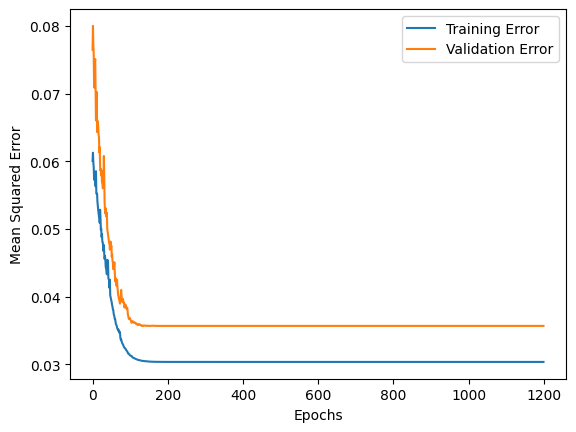

In [14]:
# Plot the evolution of the training and validation errors
import matplotlib.pyplot as plt

plt.plot(loss_history[:, 0], label='Training Error')
plt.plot(loss_history[:, 1], label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


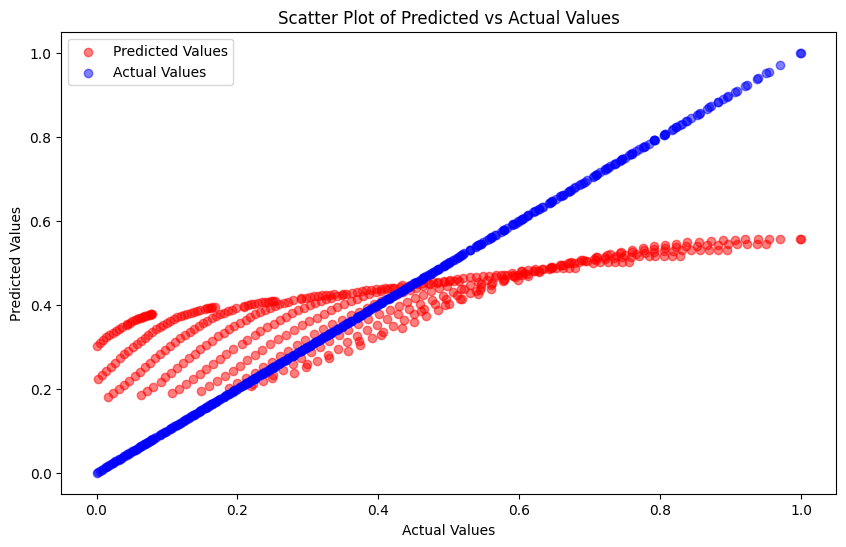

In [15]:
# Scatter plot with diagonal line and separate colors for predicted and actual values
plt.figure(figsize=(10, 6))
predictions = nn.predict(X)
plt.scatter(y, predictions, color='red', label='Predicted Values', alpha=0.5)
plt.scatter(y, y, color='blue', label='Actual Values', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.show()